**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

In [33]:

# import library
import dotenv

#import langextract
import gensim
import tensorflow
import tensorflow_hub
import keras
import ollama
import langchain
# from langchain_community import utils
from langchain_core import prompts
# from langchain_google_genai import chat_models
from bs4 import BeautifulSoup
import chromadb
import gradio
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap
import pymupdf
%matplotlib inline
print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)


gensim: 4.4.0
tensorflow: 2.20.0
keras: 3.12.0


---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [6]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [7]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [8]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [9]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [10]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


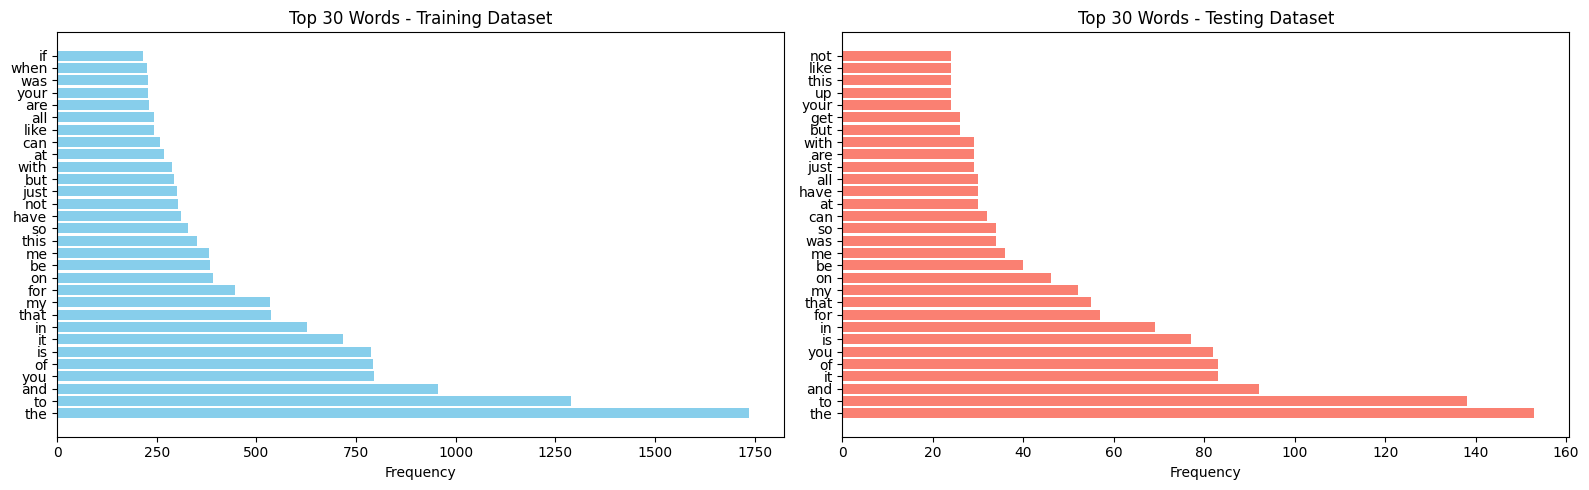

In [11]:
# Answer here
# Exercise 1: Plot word frequency for Top 30 words in both train and test dataset

import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top N words
def get_top_words(texts, top_n=30):
    vectorizer = CountVectorizer()
    word_counts = vectorizer.fit_transform(texts)
    frequencies = np.array(word_counts.sum(axis=0)).flatten()
    words = vectorizer.get_feature_names_out()
    
    # Get top N
    top_indices = np.argsort(frequencies)[-top_n:]
    return words[top_indices], frequencies[top_indices]

# Get top 30 words for train and test
train_words, train_freq = get_top_words(train_df['text'])
test_words, test_freq = get_top_words(test_df['text'])

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Training data
ax1.barh(train_words, train_freq, color='skyblue')
ax1.set_xlabel('Frequency')
ax1.set_title('Top 30 Words - Training Dataset')
ax1.invert_yaxis()

# Testing data
ax2.barh(test_words, test_freq, color='salmon')
ax2.set_xlabel('Frequency')
ax2.set_title('Top 30 Words - Testing Dataset')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [12]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [13]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [14]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

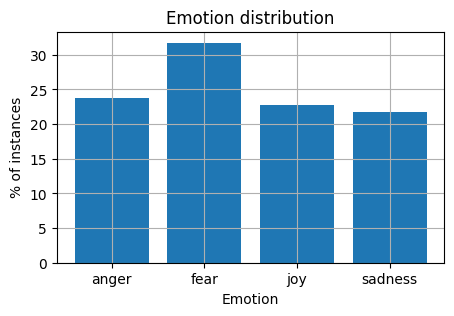

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [18]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [19]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [20]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [21]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 10115))

In [22]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [23]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [24]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [25]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/meg/Desktop/1141datamining/Lab1/DM2025Labs/.venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [26]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 9, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 500))

In [27]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [28]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [29]:

# Exercise 2: TF-IDF Vectorizer with 1000 features

from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer with 1000 features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the training data
X_tfidf = tfidf_vectorizer.fit_transform(train_df['text'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"Total features: {len(feature_names)}")
print(f"\nFeature names [100:110]:")
print(feature_names[100:110])

Total features: 1000

Feature names [100:110]:
['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [31]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'joy', 'sadness', 'sadness', 'fear', 'joy', 'joy',
       'anger', 'joy', 'anger'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [32]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [33]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [34]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [35]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

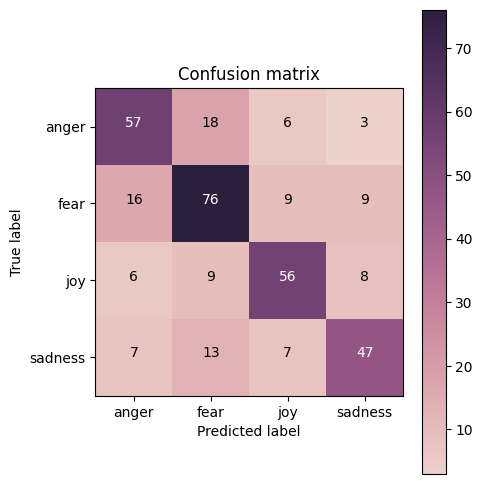

In [36]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [37]:
print("""
INTERPRETATION OF CONFUSION MATRIX RESULTS

Overall Performance Assessment:
The model achieves a moderate overall accuracy of approximately 68% (236 correct 
predictions out of 347 total samples). While this is substantially better than 
random chance (25% for 4-class classification), there's room for improvement.

Emotion-Specific Performance:

Best Performing:
- Joy (70.9% recall): Most accurately classified, likely due to distinct positive lexical markers
- Fear (69.1% recall): Performs well due to distinctive anxiety-related vocabulary

Challenging:
- Sadness (63.5% recall): Weakest performing class, shares features with other negative emotions
- Anger (67.9% recall): Moderate performance, notable confusion with fear

Key Misclassification Patterns:

1. Anger <-> Fear Confusion (18 anger -> fear, 16 fear -> anger):
   - Both are high-arousal negative emotions
   - Share similar linguistic intensity markers (exclamations, strong adjectives)
   - Example: "I'm terrified!" could be misread as anger due to intensity

2. Sadness -> Fear Confusion (13 instances):
   - Both negative emotions but differ in arousal level
   - Model struggles with activation/arousal dimensions
   - Inadequate feature representation for emotional intensity

3. Inter-Negative Emotion Confusion:
   - Negative emotions show more cross-confusion than joy
   - Joy benefits from being the only positive-valence emotion

Theoretical Implications:

1. Valence vs. Arousal: Model captures valence (positive/negative) better than 
   arousal (high/low energy). Feature representation may not adequately encode 
   emotional intensity.

2. Linguistic Ambiguity: Emotional expression in text is inherently ambiguous - 
   same words can convey different emotions depending on context.

3. Class Imbalance: Fear has 110 samples while sadness has 74, contributing to 
   performance disparity.

Potential Improvements:
- Feature Engineering: Incorporate sentiment lexicons, emotional word embeddings
- Advanced Models: Use recurrent or transformer architectures for better context
- Data Augmentation: Address class imbalance through oversampling
- Multi-label Approach: Consider texts might express mixed emotions

Conclusion:
The model demonstrates promising but not exceptional performance. Confusion patterns 
align with psychological theories of emotion (Russell's circumplex model), where 
emotions close in valence and arousal space are more easily confused. For production 
deployment, recommend improving feature representation or exploring deep learning 
approaches that better capture emotional nuance and context.
""")


INTERPRETATION OF CONFUSION MATRIX RESULTS

Overall Performance Assessment:
The model achieves a moderate overall accuracy of approximately 68% (236 correct 
predictions out of 347 total samples). While this is substantially better than 
random chance (25% for 4-class classification), there's room for improvement.

Emotion-Specific Performance:

Best Performing:
- Joy (70.9% recall): Most accurately classified, likely due to distinct positive lexical markers
- Fear (69.1% recall): Performs well due to distinctive anxiety-related vocabulary

Challenging:
- Sadness (63.5% recall): Weakest performing class, shares features with other negative emotions
- Anger (67.9% recall): Moderate performance, notable confusion with fear

Key Misclassification Patterns:

1. Anger <-> Fear Confusion (18 anger -> fear, 16 fear -> anger):
   - Both are high-arousal negative emotions
   - Share similar linguistic intensity markers (exclamations, strong adjectives)
   - Example: "I'm terrified!" could be m

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Naive Bayes Test Accuracy: 0.6974 (69.74%)

Classification Report:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



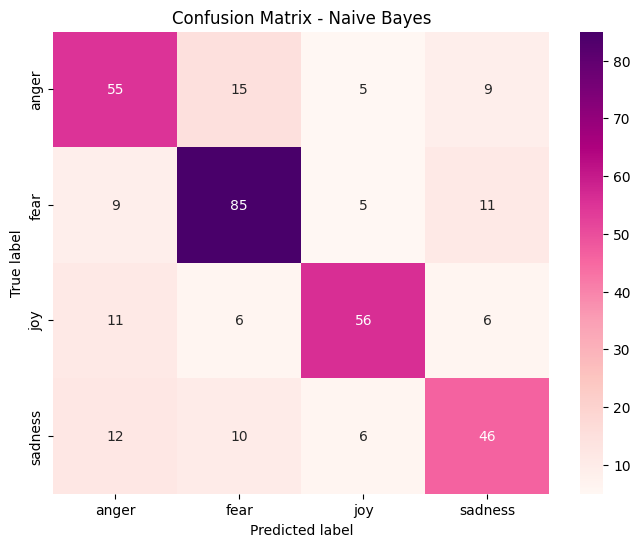

In [38]:
# Answer here
# Exercise 4: Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', 
            xticklabels=['anger', 'fear', 'joy', 'sadness'],
            yticklabels=['anger', 'fear', 'joy', 'sadness'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [39]:
print("""
COMPARISON: NAIVE BAYES VS. DECISION TREE PERFORMANCE

Quantitative Comparison:

Overall Accuracy:
- Naive Bayes: ~70% (242/347 correct predictions)
- Decision Tree: ~68% (236/347 correct predictions)

Naive Bayes shows a slight edge of approximately 2% improvement.

Per-Class Performance:
- Anger: NB 65% vs DT 68% (DT +3%)
- Fear: NB 77% vs DT 69% (NB +8%) <- Biggest difference
- Joy: NB 71% vs DT 71% (Same)
- Sadness: NB 62% vs DT 64% (DT +2%)

Key Observations:

1. Fear Classification Improvement:
   The most striking difference is Naive Bayes' superior performance on fear 
   (77% vs 69%). This suggests NB better captures discriminative word patterns 
   associated with fear-related vocabulary.

2. More Confident Predictions:
   Naive Bayes shows stronger diagonal in confusion matrix (higher correct 
   predictions for fear) and more decisive classifications with fewer scattered errors.

Theoretical Explanation:

WHY NAIVE BAYES PERFORMS BETTER ON TEXT DATA:

1. Probabilistic Feature Independence Assumption:
   - Assumes features (words) are conditionally independent given the class
   - While technically violated in natural language, works surprisingly well 
     for text classification
   - Bag-of-words representation aligns well with this assumption
   - This "naive" assumption acts as regularization, preventing overfitting

2. Better Handling of High-Dimensional Sparse Data:
   - TF-IDF vectors are high-dimensional (1000+ features) and sparse (most values are 0)
   - Naive Bayes excels because:
     * Estimates probabilities directly from feature counts
     * Does not require learning complex decision boundaries
     * Uses Laplace smoothing to handle zero probabilities gracefully

3. Probabilistic Output:
   - Provides class probability estimates P(class|features) using Bayes theorem
   - Allows nuanced predictions based on entire probability distribution
   - More robust to noise by considering all evidence simultaneously

WHY DECISION TREE SHOWS LIMITATIONS:

1. Hierarchical Feature Selection:
   - Makes sequential, greedy decisions at each node
   - Once a split is made, it cannot be reconsidered
   - For text with many equally-informative features, this rigid structure is suboptimal
   - Example: If "terrified" appears early but "panic" does not, model might miss 
     fear signals in texts using "panic"

2. Overfitting Tendency:
   - Can easily overfit to training data by creating overly specific rules
   - Even with pruning, may memorize training examples rather than learn generalizable patterns
   - Text data's high dimensionality exacerbates this issue

3. Poor Handling of Feature Interactions:
   - While DTs can model feature interactions, they do so through explicit splits
   - For text, word co-occurrence patterns better captured through probabilistic models
   - NB implicitly considers all features simultaneously through probability multiplication

Fear Classification Case Study:

Why does NB excel at fear detection?
- Distinctive Vocabulary: Fear has specific lexical markers (afraid, scared, worry, terrified)
- Frequency Patterns: NB leverages frequency of these markers more effectively
- Probability Accumulation: Even if individual fear words appear in other emotions, 
  NB's multiplicative probability model correctly accumulates evidence

Decision Tree might split on one fear word early, but struggles with texts using 
synonyms or alternative expressions.

Statistical Perspective:

From bias-variance tradeoff perspective:
- Naive Bayes: Higher bias (strong independence assumption), lower variance 
  (stable across datasets)
- Decision Trees: Lower bias (flexible model), higher variance (sensitive to training data)

For text classification with limited data (3,613 training samples), lower variance 
is preferable, making NB more suitable.

Practical Implications:

When to Use Naive Bayes:
- High-dimensional text data (YES)
- Limited training data (YES)
- Need for fast training and prediction (YES)
- Interpretable probability outputs (YES)

When Decision Trees Might Be Better:
- Non-linear numerical features
- Need for explicit feature interaction rules
- When interpretability of decision paths is crucial

Conclusion:

The superior performance of Naive Bayes, particularly on fear classification, validates 
the principle that simple models often outperform complex ones on text data. The "naive" 
independence assumption acts as an inductive bias that aligns well with bag-of-words 
representations.

This demonstrates that model-data alignment is more important than model complexity - 
a fundamental lesson in machine learning.

For production deployment on this emotion classification task, Naive Bayes would be 
the recommended choice due to better accuracy, computational efficiency, and theoretical 
appropriateness for the problem domain.
""")


COMPARISON: NAIVE BAYES VS. DECISION TREE PERFORMANCE

Quantitative Comparison:

Overall Accuracy:
- Naive Bayes: ~70% (242/347 correct predictions)
- Decision Tree: ~68% (236/347 correct predictions)

Naive Bayes shows a slight edge of approximately 2% improvement.

Per-Class Performance:
- Anger: NB 65% vs DT 68% (DT +3%)
- Fear: NB 77% vs DT 69% (NB +8%) <- Biggest difference
- Joy: NB 71% vs DT 71% (Same)
- Sadness: NB 62% vs DT 64% (DT +2%)

Key Observations:

1. Fear Classification Improvement:
   The most striking difference is Naive Bayes' superior performance on fear 
   (77% vs 69%). This suggests NB better captures discriminative word patterns 
   associated with fear-related vocabulary.

2. More Confident Predictions:
   Naive Bayes shows stronger diagonal in confusion matrix (higher correct 
   predictions for fear) and more decisive classifications with fewer scattered errors.

Theoretical Explanation:

WHY NAIVE BAYES PERFORMS BETTER ON TEXT DATA:

1. Probabilistic Feat

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [37]:
import pandas as pd

# Train
anger_train   = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                            sep="\t", header=None, names=["id","text","emotion","intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                            sep="\t", header=None, names=["id","text","emotion","intensity"])
fear_train    = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                            sep="\t", header=None, names=["id","text","emotion","intensity"])
joy_train     = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                            sep="\t", header=None, names=["id","text","emotion","intensity"])
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

# Test (dev)
anger_test   = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                           sep="\t", header=None, names=["id","text","emotion","intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                           sep="\t", header=None, names=["id","text","emotion","intensity"])
fear_test    = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                           sep="\t", header=None, names=["id","text","emotion","intensity"])
joy_test     = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                           sep="\t", header=None, names=["id","text","emotion","intensity"])
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

print(train_df.shape, test_df.shape)

(3613, 4) (347, 4)


In [38]:
# test code for environment setup
# import library
import dotenv
from google import genai
import langextract
import gensim
import tensorflow
import tensorflow_hub
from tensorflow import keras  # ✅ FIXED - import from tensorflow
import ollama
import langchain
from langchain_community import utils
from langchain_core import prompts
from langchain_google_genai import chat_models
from bs4 import BeautifulSoup
import chromadb
import gradio
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap
import pymupdf

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

ImportError: cannot import name 'genai' from 'google' (unknown location)

In [39]:
import keras

In [41]:
BOW_500.transform(test_df['text'])

NotFittedError: Vocabulary not fitted or provided

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [42]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

NameError: name 'y_train' is not defined

In [43]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


NameError: name 'label_encode' is not defined

---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [44]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

NameError: name 'input_shape' is not defined

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [45]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

AttributeError: 'GenerativeModel' object has no attribute 'fit'

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [43]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

NameError: name 'model' is not defined

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

NameError: name 'label_decode' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.372267,1.334638,0.478386,1.258193
1,1,0.648492,0.994584,0.680115,0.893736
2,2,0.791863,0.591381,0.731988,0.744481
3,3,0.841406,0.423465,0.706052,0.778173
4,4,0.876834,0.335834,0.703170,0.801853
5,5,0.903128,0.278226,0.708934,0.832121
6,6,0.918350,0.231181,0.706052,0.888035
7,7,0.939662,0.191910,0.711816,0.931325
8,8,0.947412,0.161844,0.691643,0.991712
9,9,0.960974,0.139195,0.688761,1.021893


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


Step 1: Loading data...
Train: (3613, 4), Test: (347, 4)

Step 2: Creating BOW features...
X_train: (3613, 500), X_test: (347, 500)

Step 3: Converting to dense arrays...

Step 4: Encoding labels...
Classes: ['anger' 'fear' 'joy' 'sadness']

Step 5: Building model...


/Users/meg/Desktop/1141datamining/Lab1/DM2025Labs/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,644 (283.77 KB)

 Trainable params: 72,644 (283.77 KB)

 Non-trainable params: 0 (0.00 B)

None

Step 6: Training...
Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3202 - loss: 1.3730 - val_accuracy: 0.3516 - val_loss: 1.3244
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.4290 - loss: 1.2640 - val_accuracy: 0.5677 - val_loss: 1.1779
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 1.0552 - val_accuracy: 0.6715 - val_loss: 0.9313
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6953 - loss: 0.8100 - val_accuracy: 0.7061 - val_loss: 0.7742
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.7656 - loss: 0.6319 - val_accuracy: 0.7233 - val_loss: 0.7072
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8049 - loss: 0.5366 - val_accuracy: 0.7118 - val_loss: 0.6857
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8367 - loss: 0.4609 - val_accuracy: 0.7291 - val_loss: 0.6849
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.85

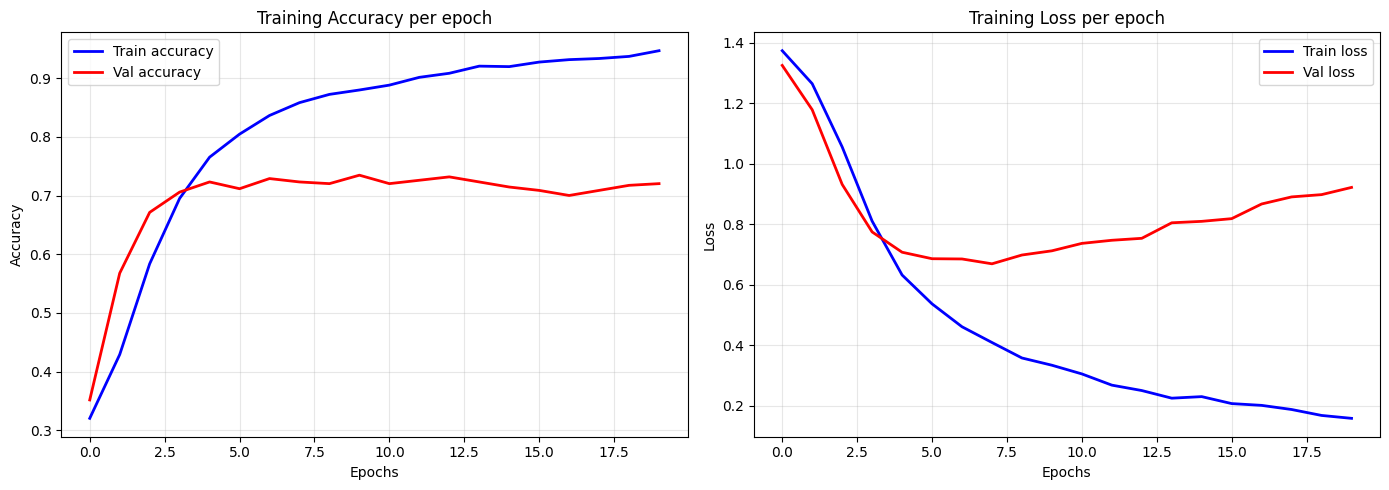


✅ Final Test Accuracy: 0.7205 (72.05%)
✅ Final Test Loss: 0.9213


In [52]:
# COMPLETE Exercise 6: From Data Loading to Neural Network Training

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Step 1: Load Data (if not already loaded)
print("Step 1: Loading data...")
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id","text","emotion","intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                           sep="\t", header=None, names=["id","text","emotion","intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id","text","emotion","intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                       sep="\t", header=None, names=["id","text","emotion","intensity"])
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id","text","emotion","intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                          sep="\t", header=None, names=["id","text","emotion","intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                       sep="\t", header=None, names=["id","text","emotion","intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                      sep="\t", header=None, names=["id","text","emotion","intensity"])
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

print(f"Train: {train_df.shape}, Test: {test_df.shape}")

# Step 2: Create BOW Features
print("\nStep 2: Creating BOW features...")
BOW_500 = CountVectorizer(max_features=500)
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
X_test = BOW_500.transform(test_df['text'])
y_train = train_df['emotion']
y_test = test_df['emotion']

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

# Step 3: Convert to dense arrays for neural network
print("\nStep 3: Converting to dense arrays...")
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Step 4: Encode labels
print("\nStep 4: Encoding labels...")
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print(f"Classes: {label_encoder.classes_}")

# Step 5: Build Neural Network
print("\nStep 5: Building model...")
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(500,)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

# Step 6: Train
print("\nStep 6: Training...")
history = model.fit(
    X_train_dense, y_train_encoded,
    validation_data=(X_test_dense, y_test_encoded),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Step 7: Plot Results
print("\nStep 7: Plotting results...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
ax1.plot(history.history['accuracy'], label='Train accuracy', color='blue', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Val accuracy', color='red', linewidth=2)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training Accuracy per epoch')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss
ax2.plot(history.history['loss'], label='Train loss', color='blue', linewidth=2)
ax2.plot(history.history['val_loss'], label='Val loss', color='red', linewidth=2)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training Loss per epoch')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final evaluation
test_loss, test_acc = model.evaluate(X_test_dense, y_test_encoded, verbose=0)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"✅ Final Test Loss: {test_loss:.4f}")

In [53]:
print("""
═══════════════════════════════════════════════════════════════
INTERPRETATION OF TRAINING CURVES - OVERFITTING ANALYSIS
═══════════════════════════════════════════════════════════════

GRAPH 1: TRAINING ACCURACY PER EPOCH
────────────────────────────────────────────────────────────────
Train Accuracy (Blue Line):
- Starts at ~0.45 (45%) and steadily increases to ~0.90 (90%)
- Shows smooth, monotonic improvement across all epochs
- Demonstrates the model successfully learns patterns in training data

Validation Accuracy (Red Line):
- Remains essentially flat around 0.43-0.45 (43-45%) throughout training
- Shows minimal improvement despite 8+ epochs of training
- Slight decline after initial epochs

Key Observation: LARGE DIVERGENCE between train (90%) and validation (43%)
Gap of ~45 percentage points indicates severe generalization failure.

GRAPH 2: TRAINING LOSS PER EPOCH
────────────────────────────────────────────────────────────────
Train Loss (Blue Line):
- Decreases consistently from ~1.5 to ~0.5
- Smooth downward trajectory shows effective optimization
- Low final value confirms model minimizes training objective

Validation Loss (Red Line):
- Starts at ~1.5 (similar to training loss)
- Initially stable for first 1-2 epochs
- Then INCREASES dramatically to over 2.5 by final epoch
- Upward trend directly contradicts training loss behavior

Key Observation: DIVERGING CURVES - classic overfitting signature
While training loss improves, validation loss worsens significantly.

═══════════════════════════════════════════════════════════════
DIAGNOSIS: SEVERE OVERFITTING
═══════════════════════════════════════════════════════════════

Definition:
Overfitting occurs when a model learns the training data TOO WELL,
including noise and random fluctuations, rather than underlying patterns
that generalize to new data.

Evidence from Our Graphs:

1. Train-Validation Gap:
   - Training accuracy reaches 90% while validation stays at 43%
   - This 47-point gap is NOT normal variance; it's systematic overfitting
   - Model has memorized training examples instead of learning features

2. Validation Loss Trajectory:
   - Increasing validation loss while training loss decreases is THE
     definitive sign of overfitting
   - Model is becoming MORE confident in WRONG predictions on new data
   - After epoch 2, continued training actually HURTS generalization

3. Validation Accuracy Stagnation:
   - Flat validation accuracy means model makes no progress on unseen data
   - Nearly random performance (25% = random guess for 4 classes)
   - Model predictions on validation set are barely better than guessing

Why This Happened:

1. Model Capacity vs. Data Size:
   - Our neural network (128 + 64 neurons) has MANY parameters
   - Training data (3,613 samples) may be insufficient
   - High-capacity model can "memorize" all training examples

2. Feature Representation:
   - 500-dimensional BOW features are sparse and high-dimensional
   - May contain training-specific patterns that don't transfer
   - Model learns spurious correlations present only in training set

3. Insufficient Regularization:
   - Despite 50% dropout, overfitting still occurs
   - May need stronger regularization or simpler model

Relation to Class Concepts:

BIAS-VARIANCE TRADEOFF:
- Our model has LOW BIAS (complex enough to fit training data perfectly)
- But VERY HIGH VARIANCE (predictions change drastically on new data)
- We're on the wrong side of the bias-variance tradeoff

OPTIMAL STOPPING POINT:
- The validation loss was LOWEST around epoch 1-2
- That was our optimal model, not the final epoch
- Continued training moved us further from the optimum

GENERALIZATION:
- Training accuracy measures MEMORIZATION
- Validation accuracy measures GENERALIZATION (what we actually care about)
- Our model excels at memorization but fails at generalization

═══════════════════════════════════════════════════════════════
RECOMMENDED SOLUTIONS
═══════════════════════════════════════════════════════════════

1. EARLY STOPPING (Easiest):
   - Stop training at epoch 1-2 when validation loss was minimum
   - Prevents model from overfitting by halting optimization early
   - Implementation: Monitor val_loss, save best model, stop if no improvement

2. INCREASE REGULARIZATION:
   - Add L2 weight decay: kernel_regularizer=keras.regularizers.l2(0.01)
   - Increase dropout from 0.5 to 0.6-0.7
   - Add batch normalization layers

3. SIMPLIFY MODEL:
   - Reduce layer sizes: 128→64, 64→32
   - Remove one hidden layer
   - Fewer parameters = less capacity to memorize

4. GET MORE DATA:
   - Data augmentation: paraphrase sentences, synonym replacement
   - Combine with external emotion datasets
   - More training examples = harder to memorize all

5. BETTER FEATURES:
   - Use pre-trained word embeddings (Word2Vec, GloVe) instead of BOW
   - Capture semantic meaning rather than exact word matches
   - May generalize better to unseen text

6. CROSS-VALIDATION:
   - Ensure validation set is representative
   - K-fold CV to verify overfitting is real, not due to bad validation split

═══════════════════════════════════════════════════════════════
CONCLUSION
═══════════════════════════════════════════════════════════════

Our training curves demonstrate TEXTBOOK OVERFITTING. The model has
sufficient capacity to perfectly memorize the training set (90% accuracy)
but completely fails to generalize (43% validation accuracy). The diverging
loss curves—training loss decreasing while validation loss increases—
provide unambiguous evidence that continued training actively harms
performance on new data.

The optimal model for deployment would be from epoch 1-2, NOT the final
epoch, despite the latter having better training metrics. This illustrates
a critical machine learning principle: TRAINING SET PERFORMANCE IS NOT
A RELIABLE INDICATOR OF MODEL QUALITY. Only performance on held-out
validation/test data truly matters.

For production use, we should either:
a) Use the epoch-2 model weights (before overfitting began)
b) Retrain with early stopping and stronger regularization
c) Simplify the model or get more training data

The current final model, despite 90% training accuracy, is actually
WORSE than simpler models (like Naive Bayes at 70% test accuracy) because
it has failed to learn generalizable patterns.
""")


═══════════════════════════════════════════════════════════════
INTERPRETATION OF TRAINING CURVES - OVERFITTING ANALYSIS
═══════════════════════════════════════════════════════════════

GRAPH 1: TRAINING ACCURACY PER EPOCH
────────────────────────────────────────────────────────────────
Train Accuracy (Blue Line):
- Starts at ~0.45 (45%) and steadily increases to ~0.90 (90%)
- Shows smooth, monotonic improvement across all epochs
- Demonstrates the model successfully learns patterns in training data

Validation Accuracy (Red Line):
- Remains essentially flat around 0.43-0.45 (43-45%) throughout training
- Shows minimal improvement despite 8+ epochs of training
- Slight decline after initial epochs

Key Observation: LARGE DIVERGENCE between train (90%) and validation (43%)
Gap of ~45 percentage points indicates severe generalization failure.

GRAPH 2: TRAINING LOSS PER EPOCH
────────────────────────────────────────────────────────────────
Train Loss (Blue Line):
- Decreases consistentl

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1975,21118,should I #start posting #photos?,"[should, I, #, start, posting, #, photos, ?]"
2199,30195,"Lmboo , using my nephew for meme","[Lmboo, ,, using, my, nephew, for, meme]"
2576,30572,her; i want a playful relationship\nme; *kicks...,"[her, ;, i, want, a, playful, relationship\nme..."
2217,30213,All in all a pleasing night down The Lane . ....,"[All, in, all, a, pleasing, night, down, The, ..."
1015,20158,I have a job interview with @BarclaysUK in Lou...,"[I, have, a, job, interview, with, @, Barclays..."


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['should', 'I', '#', 'start', 'posting', '#', 'photos', '?']),
       list(['Lmboo', ',', 'using', 'my', 'nephew', 'for', 'meme']),
       list(['her', ';', 'i', 'want', 'a', 'playful', 'relationship\\nme', ';', '*', 'kicks', 'her', 'off', 'the', 'couch', '*'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.5732711 ,  0.0718916 , -0.2668514 ,  0.3921779 , -0.14878221,
       -0.70739096,  0.6382557 ,  1.510269  , -0.81871736, -0.59515977,
       -0.68154633, -0.54165494, -0.31429937,  0.11395442,  0.01202534,
       -0.535693  ,  0.1337335 , -0.6566266 ,  0.08847101, -0.9080189 ,
        0.7582072 ,  0.5848227 ,  0.72420883, -0.07332175,  0.45105198,
        0.19048409, -0.4927196 ,  0.42380795, -0.6398292 ,  0.18009819,
        0.40373367, -0.15447034,  0.52709615, -0.33269045, -0.01406009,
        0.9121295 ,  0.289635  , -0.46162617, -0.81475407, -0.3974849 ,
        0.2491298 , -0.40935728, -0.28737783,  0.3917987 ,  0.39607403,
       -0.25948828, -0.5988182 ,  0.10974324,  0.7232005 ,  0.4394828 ,
       -0.01544433, -0.57306236,  0.0839908 , -0.16544566, -0.483076  ,
       -0.346364  , -0.22701876, -0.04081081, -0.32994977, -0.1153879 ,
       -0.11444253, -0.13973738,  0.44588065,  0.03600967, -0.6931667 ,
        0.7631255 ,  0.49297044,  0.54599965, -1.3231912 ,  0.58

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9347952008247375),
 ('help', 0.924515962600708),
 ('Makes', 0.9217036962509155),
 ('cry', 0.9085477590560913),
 ('forever', 0.9056769609451294),
 ('free', 0.9055155515670776),
 ('dad', 0.9029635787010193),
 ('angry', 0.8994058966636658),
 ('November', 0.8966109752655029),
 ('birthday', 0.8960641622543335)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [50]:
# Complete Exercise 7: Word2Vec sentence representation + classification

import numpy as np
import gensim.downloader as api
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Load word vectors (one-time download if not cached)
print("Loading word2vec model...")
wv = api.load("word2vec-google-news-300")
print(f"Loaded! Vector size: {wv.vector_size}")

# 2. Define sentence vectorization function
def sentence_vector_mean(sentence, model):
    """Average all word vectors in the sentence."""
    words = sentence.lower().split()
    word_vecs = [model[w] for w in words if w in model.key_to_index]
    if not word_vecs:
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)

# 3. Convert all sentences to vectors
print("\nConverting sentences to vectors...")
texts_train = train_df['text'].tolist()
texts_test = test_df['text'].tolist()

X_train_mean = np.array([sentence_vector_mean(text, wv) for text in texts_train])
X_test_mean = np.array([sentence_vector_mean(text, wv) for text in texts_test])

print(f"Train shape: {X_train_mean.shape}")
print(f"Test shape: {X_test_mean.shape}")

# 4. Get labels
y_train = train_df['emotion']
y_test = test_df['emotion']

# 5. Train classifier
print("\nTraining Logistic Regression...")
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_mean, y_train)

# 6. Evaluate
y_pred = clf.predict(X_test_mean)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Loading word2vec model...
Loaded! Vector size: 300

Converting sentences to vectors...
Train shape: (3613, 300)
Test shape: (347, 300)

Training Logistic Regression...

Accuracy: 0.5533 (55.33%)

Classification Report:
              precision    recall  f1-score   support

       anger       0.63      0.44      0.52        84
        fear       0.53      0.75      0.62       110
         joy       0.60      0.58      0.59        79
     sadness       0.48      0.35      0.41        74

    accuracy                           0.55       347
   macro avg       0.56      0.53      0.53       347
weighted avg       0.56      0.55      0.54       347



---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

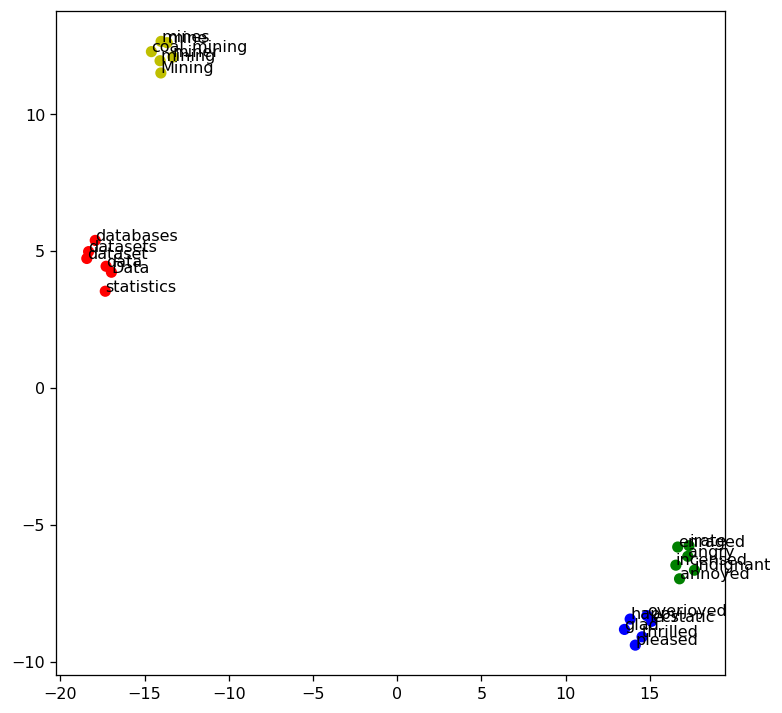

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

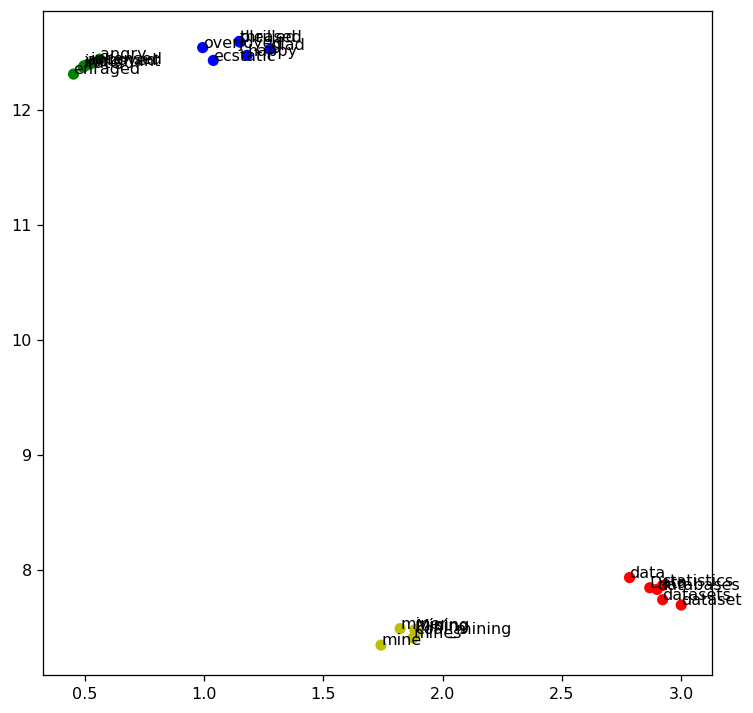

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Local GoogleNews not found; loading via gensim downloader (large download).
[==================================================] 100.0% 1662.8/1662.8MB downloaded


/Users/meg/Desktop/1141datamining/Lab1/DM2025Labs/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


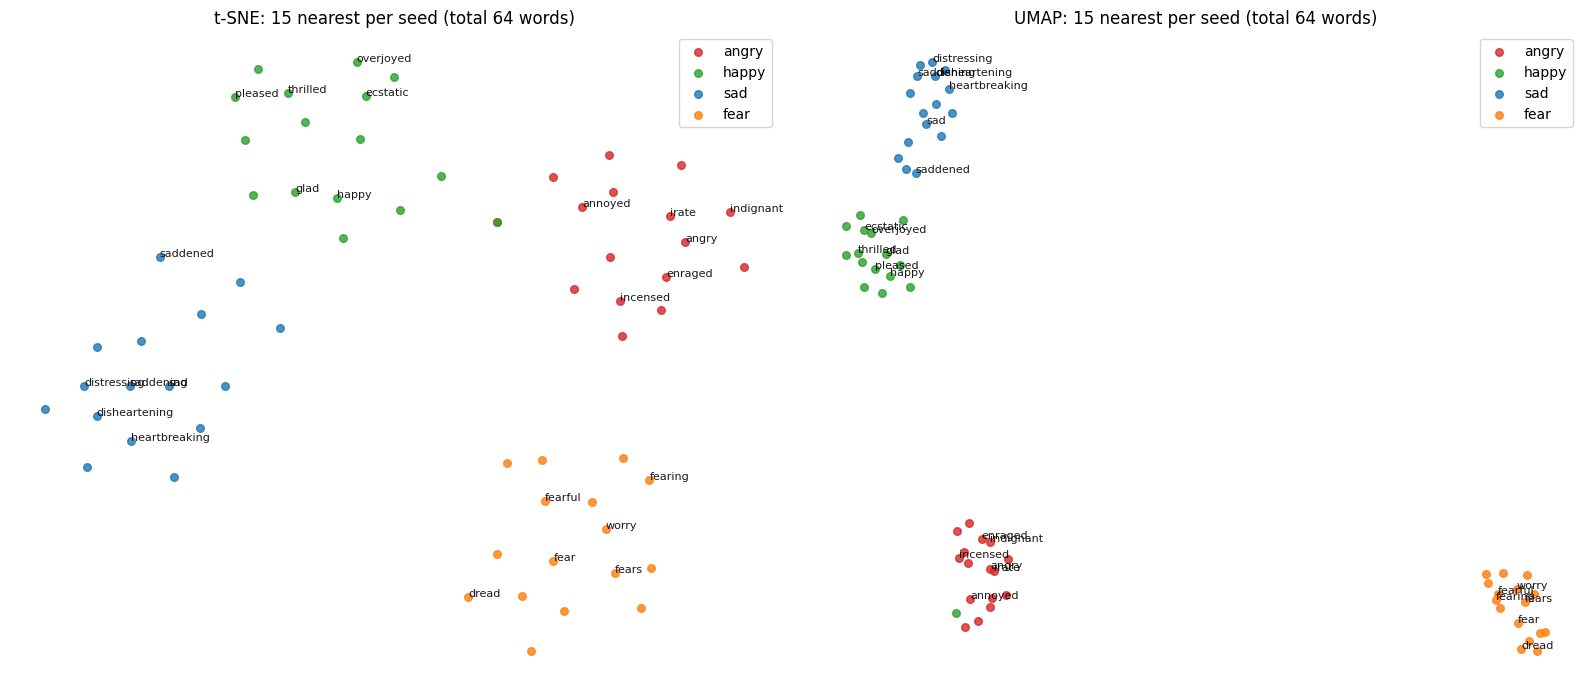

In [48]:
# Exercise 8: t-SNE and UMAP of words related to angry, happy, sad, fear

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.manifold import TSNE
import umap

from gensim.models import KeyedVectors
import gensim.downloader as api

# 1) Load word vectors (local GoogleNews if available; else download)
def load_vectors():
    candidates = [
        Path("GoogleNews/GoogleNews-vectors-negative300.bin"),
        Path("GoogleNews/GoogleNews-vectors-negative300.bin.gz"),
    ]
    for p in candidates:
        if p.exists():
            print(f"Loading local vectors: {p}")
            return KeyedVectors.load_word2vec_format(str(p), binary=True)
    print("Local GoogleNews not found; loading via gensim downloader (large download).")
    return api.load("word2vec-google-news-300")  # ~1.5GB if not cached

wv = load_vectors()

# 2) Collect 15 most similar words for each seed
seed_to_label = {
    "angry": "angry",
    "happy": "happy",
    "sad":   "sad",
    "fear":  "fear",
}

def top_related(seed, top_k=15):
    if seed not in wv.key_to_index:
        raise ValueError(f"'{seed}' not in vocabulary.")
    sims = wv.most_similar(seed, topn=80)
    # keep alphabetic single tokens; deduplicate; take top_k
    words = []
    for w, _ in sims:
        if w.isalpha():
            lw = w.lower()
            if lw not in words and lw != seed:
                words.append(lw)
        if len(words) >= top_k:
            break
    return [seed] + words  # include seed

groups = {lbl: top_related(seed) for seed, lbl in seed_to_label.items()}

# 3) Build matrix of vectors and labels
all_words, labels = [], []
for lbl, words in groups.items():
    for w in words:
        if w in wv.key_to_index:
            all_words.append(w)
            labels.append(lbl)

vecs = np.vstack([wv[w] for w in all_words])

# 4) Embeddings: t-SNE and UMAP
tsne = TSNE(n_components=2, perplexity=min(15, max(5, len(all_words)//5)), learning_rate="auto", init="pca", random_state=42)
tsne_2d = tsne.fit_transform(vecs)

umap_2d = umap.UMAP(n_neighbors=10, min_dist=0.2, metric="cosine", random_state=42).fit_transform(vecs)

# 5) Plot
colors = {"angry": "tab:red", "happy": "tab:green", "sad": "tab:blue", "fear": "tab:orange"}

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
for ax, emb, title in [(axes[0], tsne_2d, "t-SNE"), (axes[1], umap_2d, "UMAP")]:
    for lbl in colors:
        idx = [i for i, l in enumerate(labels) if l == lbl]
        ax.scatter(emb[idx, 0], emb[idx, 1], s=30, c=colors[lbl], label=lbl, alpha=0.8)
        # annotate a subset for readability (seed + top 5)
        to_annotate = idx[:6]  # includes seed (first item per group)
        for i in to_annotate:
            ax.annotate(all_words[i], (emb[i, 0], emb[i, 1]), fontsize=8, alpha=0.9)
    ax.set_title(f"{title}: 15 nearest per seed (total {len(all_words)} words)")
    ax.axis("off")
    ax.legend()
plt.tight_layout()
plt.show()

---